# 2D Diffusion-Limited Aggrigation

iteration: 0 Particle Count: 1000
iteration: 100 Particle Count: 998
iteration: 200 Particle Count: 994
iteration: 300 Particle Count: 993
iteration: 400 Particle Count: 992


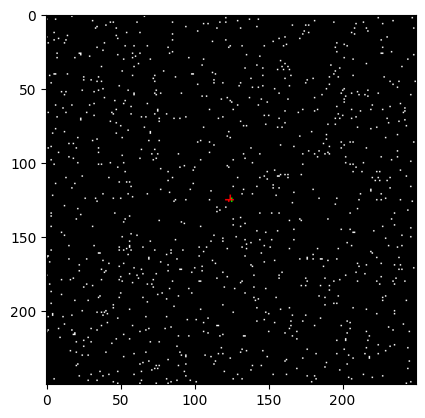

In [33]:
#%%time
#pixel motion 495
#TODO Save Seed data!

import numpy
import random
import os
from PIL import Image

#Dr.Abram's code
from matplotlib import pyplot as plt

def twod_simulation(size, points, iterations):
    n=size
    data = numpy.zeros((n,n,3),dtype=numpy.uint8)
    danger_zone=numpy.zeros((n+1,n+1,1),dtype=numpy.uint8)

    live_points_count = points
    original_count = live_points_count
    particles = []

    #Create random set of live points, and make them visible
    i=0
    x=numpy.random.randint(0,n-1,size=live_points_count)
    y=numpy.random.randint(0,n-1,size=live_points_count)

    while i < live_points_count:
        data[x[i]][y[i]] = [255,255,255]
        coord = (x[i],y[i])
        #TODO create a far list and a near list.
        #The near list should only be particles that are within a certain x by x square and are updated every single step
        #The far list are updated every 20 steps.
        particles.append(coord)
        i+=1

    center = n//2
    #set center to red

    data[center][center]=[255,0,0]

    #Look at the points around the center, and set them as 'killer' space
    danger_zone[center][center]=1

    #left and right
    danger_zone[center-1][center]=1
    danger_zone[center+1][center]=1
    data[center-1][center]=[0,255,0]
    data[center+1][center]=[0,255,0]

    #Up and Down
    danger_zone[center][center-1]=1
    danger_zone[center][center+1]=1
    data[center][center-1]=[0,255,0]
    data[center][center+1]=[0,255,0]

    image = Image.fromarray(data)
    image.show()

    for frame in range(iterations):
        live_points_count = len(particles)
        rand_motion = numpy.random.randint(0,4,live_points_count)
        movement = list(zip(particles,rand_motion))
        
        if frame % 100 == 0:
            print('iteration: ' + str(frame) + ' Particle Count: ' + str(live_points_count))

        for idx, pixel in enumerate(movement):
            #set current spot to black, pixel[0] is the particle and pixel[1] is the random motion for particle
            x=pixel[0][0]
            y=pixel[0][1]
            data[x][y] = [0,0,0]

            if(pixel[1]==0):
                #Particle moves upwards!
                y+=1

                if(y>=n):
                    y=0   
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==1):
                #Particle moves downwards!
                y-=1
                if(y<=-1):
                    y=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)


            elif(pixel[1]==2):
                #Particle moves left!
                x-=1
                if(x<=-1):
                    x=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==3):
                #Particle moves right!
                x+=1
                if(x>=n):
                    x=0
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            else:
                print('error!!!')

            #make the danger-zone check
            if(danger_zone[x][y]==1):
                #print('Danger Zoned!')
                if(live_points_count > 3*(original_count//4)): data[x][y] = [255,0,0]
                elif(live_points_count > 2*(original_count//4)): data[x][y] = [0,255,0]
                elif(live_points_count > original_count//4): data[x][y] = [0,0,255]
                else: data[x][y] = [255,0,255]
                
                
                particles.pop(idx) # WARNING probably O(N)
                movement.pop(idx)
                #TODO When fractal reaches end, danger zone attempts to grow larger. Prevent this.
                danger_zone[x-1][y]=1
                danger_zone[x+1][y]=1
                #data[x-1][y]=[0,255,0]
                #data[x+1][y]=[0,255,0]

                #Up and Down
                danger_zone[x][y-1]=1
                danger_zone[x][y+1]=1
                #data[x][y-1]=[0,255,0]
                #data[x][y+1]=[0,255,0]



            
    image = Image.fromarray(data)
    image.show()

    return data;


# from Dr.Abram -- show data
plt.imshow(twod_simulation(250,1000,500))


# save data
#with open('/tmp/result2.np', 'wb') as f:
    #numpy.save(f, numpy.array(data))

#list_of_files = ['/tmp/result1.np']

#all_results = []
#for file in list_of_files:
    #with open(file, 'rb') as f:
        #all_results.append(numpy.load(f))
        
#all_results = numpy.array(all_results)
#all_results.shape # we see from the shape, that we have two figures 200 x 200
        
        


iteration: 0 Particle Count: 1000
iteration: 100 Particle Count: 998
iteration: 200 Particle Count: 997
iteration: 300 Particle Count: 994
iteration: 400 Particle Count: 994
iteration: 500 Particle Count: 990
iteration: 600 Particle Count: 989
iteration: 700 Particle Count: 989
iteration: 800 Particle Count: 985
iteration: 900 Particle Count: 984
iteration: 1000 Particle Count: 984
iteration: 1100 Particle Count: 981
iteration: 1200 Particle Count: 981
iteration: 1300 Particle Count: 980
iteration: 1400 Particle Count: 979
iteration: 1500 Particle Count: 979
iteration: 1600 Particle Count: 977
iteration: 1700 Particle Count: 976
iteration: 1800 Particle Count: 975
iteration: 1900 Particle Count: 974
iteration: 2000 Particle Count: 973
iteration: 2100 Particle Count: 971
iteration: 2200 Particle Count: 971
iteration: 2300 Particle Count: 970
iteration: 2400 Particle Count: 969
iteration: 2500 Particle Count: 969
iteration: 2600 Particle Count: 967
iteration: 2700 Particle Count: 966
ite

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

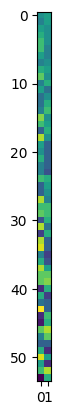

In [37]:
#%%time
#pixel motion 495
#TODO Save Seed data!

import numpy
import random
import os
from PIL import Image

#Dr.Abram's code
from matplotlib import pyplot as plt

#TODO make this function return a set of fractal points only.
# maybe return the dead set?
def twod_simulation(size, points, iterations):
    n=size
    data = numpy.zeros((n,n,3),dtype=numpy.uint8)
    danger_zone=numpy.zeros((n+1,n+1,1),dtype=numpy.uint8)

    live_points_count = points
    original_count = live_points_count
    particles = []

    #Create random set of live points, and make them visible
    i=0
    x=numpy.random.randint(0,n-1,size=live_points_count)
    y=numpy.random.randint(0,n-1,size=live_points_count)

    while i < live_points_count:
        data[x[i]][y[i]] = [255,255,255]
        coord = (x[i],y[i])
        #TODO create a far list and a near list.
        #The near list should only be particles that are within a certain x by x square and are updated every single step
        #The far list are updated every 20 steps.
        particles.append(coord)
        i+=1

    center = n//2
    #set center to red

    data[center][center]=[255,0,0]

    #Look at the points around the center, and set them as 'killer' space
    danger_zone[center][center]=1

    #left and right
    danger_zone[center-1][center]=1
    danger_zone[center+1][center]=1
    data[center-1][center]=[0,255,0]
    data[center+1][center]=[0,255,0]

    #Up and Down
    danger_zone[center][center-1]=1
    danger_zone[center][center+1]=1
    data[center][center-1]=[0,255,0]
    data[center][center+1]=[0,255,0]

    image = Image.fromarray(data)
    image.show()

    dead_set = []
    for frame in range(iterations):
        live_points_count = len(particles)
        rand_motion = numpy.random.randint(0,4,live_points_count)
        movement = list(zip(particles,rand_motion))
        
        if frame % 100 == 0:
            print('iteration: ' + str(frame) + ' Particle Count: ' + str(live_points_count))

        for idx, pixel in enumerate(movement):
            #set current spot to black, pixel[0] is the particle and pixel[1] is the random motion for particle
            x=pixel[0][0]
            y=pixel[0][1]
            data[x][y] = [0,0,0]

            if(pixel[1]==0):
                #Particle moves upwards!
                y+=1

                if(y>=n):
                    y=0   
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==1):
                #Particle moves downwards!
                y-=1
                if(y<=-1):
                    y=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)


            elif(pixel[1]==2):
                #Particle moves left!
                x-=1
                if(x<=-1):
                    x=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==3):
                #Particle moves right!
                x+=1
                if(x>=n):
                    x=0
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            else:
                print('error!!!')

            #make the danger-zone check
            if(danger_zone[x][y]==1):
                #These IF statements just set the color of the fractal.
                if(live_points_count > 3*(original_count//4)): data[x][y] = [255,0,0]
                elif(live_points_count > 2*(original_count//4)): data[x][y] = [0,255,0]
                elif(live_points_count > original_count//4): data[x][y] = [0,0,255]
                else: data[x][y] = [255,0,255]
                
                
                particles.pop(idx) # WARNING probably O(N)
                movement.pop(idx)

                dead_coord = (x,y)

                dead_set.append(numpy.array(dead_coord))
                #TODO When fractal reaches end, danger zone attempts to grow larger. Prevent this.
                danger_zone[x-1][y]=1
                danger_zone[x+1][y]=1
                #data[x-1][y]=[0,255,0]
                #data[x+1][y]=[0,255,0]

                #Up and Down
                danger_zone[x][y-1]=1
                danger_zone[x][y+1]=1
                #data[x][y-1]=[0,255,0]
                #data[x][y+1]=[0,255,0]



            
    image = Image.fromarray(data)
    image.show()

    return dead_set


# from Dr.Abram -- show data
pts_1 = twod_simulation(250,1000,5000)
print(pts_1[0])
plt.imshow(pts_1)

data_dist = numpy.zeros((250, 250))
for x, y in pts_1:
    data_dist[int(x)+(250/2), int(y)+(250/2)] += 1

plt.imshow(data_dist)
# save data
#with open('/tmp/result2.np', 'wb') as f:
    #numpy.save(f, numpy.array(data))

#list_of_files = ['/tmp/result1.np']

#all_results = []
#for file in list_of_files:
    #with open(file, 'rb') as f:
        #all_results.append(numpy.load(f))
        
#all_results = numpy.array(all_results)
#all_results.shape # we see from the shape, that we have two figures 200 x 200
        
        


iteration: 0 Particle Count: 10000
iteration: 100 Particle Count: 9793
iteration: 200 Particle Count: 9701
iteration: 300 Particle Count: 9619
iteration: 400 Particle Count: 9543
iteration: 500 Particle Count: 9493
iteration: 600 Particle Count: 9440
iteration: 700 Particle Count: 9397
iteration: 800 Particle Count: 9350
iteration: 900 Particle Count: 9315
iteration: 1000 Particle Count: 9283
iteration: 1100 Particle Count: 9245
iteration: 1200 Particle Count: 9207
iteration: 1300 Particle Count: 9167
iteration: 1400 Particle Count: 9139
iteration: 1500 Particle Count: 9102
iteration: 1600 Particle Count: 9068
iteration: 1700 Particle Count: 9039
iteration: 1800 Particle Count: 9012
iteration: 1900 Particle Count: 8982
iteration: 2000 Particle Count: 8959
iteration: 2100 Particle Count: 8929
iteration: 2200 Particle Count: 8896
iteration: 2300 Particle Count: 8866
iteration: 2400 Particle Count: 8837
iteration: 2500 Particle Count: 8819
iteration: 2600 Particle Count: 8800
iteration: 2

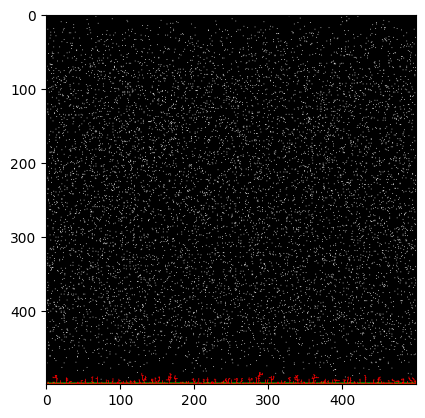

In [ ]:
%%time
def tree_simulation(size, points, iterations):
    n=size
    data = numpy.zeros((n,n,3),dtype=numpy.uint8)
    danger_zone=numpy.zeros((n+1,n+1,1),dtype=numpy.uint8)

    live_points_count = points
    original_count = live_points_count
    particles = []

    #Create random set of live points, and make them visible
    i=0
    x=numpy.random.randint(0,n-1,size=live_points_count)
    y=numpy.random.randint(0,n-1,size=live_points_count)

    while i < live_points_count:
        data[x[i]][y[i]] = [255,255,255]
        coord = (x[i],y[i])
        #TODO create a far list and a near list.
        #The near list should only be particles that are within a certain x by x square and are updated every single step
        #The far list are updated every 20 steps.
        particles.append(coord)
        i+=1

    center = n//2

    

    for x in range(n):
        #set bottom line row to red and set them as a killer space
        data[n-1][x]=[255,0,0]
        danger_zone[n-1][x]=1

        #Look at points above the line to set to killer.
        danger_zone[n-2][x]=1
        data[n-2][x]=[0,255,0]

   

    image = Image.fromarray(data)
    image.show()

    for frame in range(iterations):
        live_points_count = len(particles)
        rand_motion = numpy.random.randint(0,4,live_points_count)
        movement = list(zip(particles,rand_motion))
        
        if frame % 100 == 0:
            print('iteration: ' + str(frame) + ' Particle Count: ' + str(live_points_count))

        for idx, pixel in enumerate(movement):
            #set current spot to black, pixel[0] is the particle and pixel[1] is the random motion for particle
            x=pixel[0][0]
            y=pixel[0][1]
            data[x][y] = [0,0,0]

            if(pixel[1]==0):
                #Particle moves upwards!
                y+=1

                if(y>=n):
                    y=0   
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==1):
                #Particle moves downwards!
                y-=1
                if(y<=-1):
                    y=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)


            elif(pixel[1]==2):
                #Particle moves left!
                x-=1
                if(x<=-1):
                    x=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==3):
                #Particle moves right!
                x+=1
                if(x>=n):
                    x=0
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            else:
                print('error!!!')

            #make the danger-zone check
            if(danger_zone[x][y]==1):
                #print('Danger Zoned!')
                if(live_points_count > 3*(original_count//4)): data[x][y] = [255,0,0]
                elif(live_points_count > 2*(original_count//4)): data[x][y] = [0,255,0]
                elif(live_points_count > original_count//4): data[x][y] = [0,0,255]
                else: data[x][y] = [255,0,255]
                
                
                particles.pop(idx) # WARNING probably O(N)
                movement.pop(idx)
                #TODO When fractal reaches end, danger zone attempts to grow larger. Prevent this.
                danger_zone[x-1][y]=1
                danger_zone[x+1][y]=1
                #data[x-1][y]=[0,255,0]
                #data[x+1][y]=[0,255,0]

                #Up and Down
                danger_zone[x][y-1]=1
                danger_zone[x][y+1]=1
                #data[x][y-1]=[0,255,0]
                #data[x][y+1]=[0,255,0]



            
    image = Image.fromarray(data)
    image.show()

    return data;

plt.imshow(tree_simulation(500,10000,5000))